# Logistics Regression using Regularization

In previous post, we built basic Logistics regression. We looked into p-value and removed unimporant features. In this exercise, let's build GridSearch, CV and Regularization technique to build more robust model.
____

In [1]:
### Importing important libraries

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

## importing Logistics Regression from Scikit
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

### Disabling warnings

import warnings
warnings.filterwarnings('ignore', category = FutureWarning)
warnings.filterwarnings('ignore', category = DeprecationWarning)
warnings.filterwarnings("ignore")


C:\Users\Z100054\AppData\Local\conda\conda\envs\Python 3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
## importing dataset

train = pd.read_csv("Data/Classification_Train.csv")

In [3]:
### As we are dealing with boolean output either 0 or 1, we will subset the dataset for have these 2 kind of outputs only.
### We won't do it in real world and try to implement any other ML method which can deal with multi-classifiers 

train = train[train['price_range'].isin([0,1])]
train.shape

(1000, 21)

In [4]:
### Let's split the data into X and y

X = train.iloc[:,:len(train.columns)-1]
y = train.iloc[:,len(train.columns)-1]
X.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0
5,1859,0,0.5,1,3,0,22,0.7,164,1,7,1004,1654,1067,17,1,10,1,0,0
7,1954,0,0.5,1,0,0,24,0.8,187,4,0,512,1149,700,16,3,5,1,1,1
8,1445,1,0.5,0,0,0,53,0.7,174,7,14,386,836,1099,17,1,20,1,0,0


In [5]:
### Let's split the data into train and test

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 101)
X_train.shape

(700, 20)

In [6]:
LogisticRegression()

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [7]:
## Importing GridSearch

from sklearn.model_selection import GridSearchCV

lr = LogisticRegression()

parameters = {
    'C' : [0.001, 0.01, .1, 1, 10, 100]  ##Passing regularization values in a list
}

logit_cv = GridSearchCV(lr, parameters, cv = 5)
logit_cv.fit(X_train, y_train.values.ravel())


GridSearchCV(cv=5, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [8]:
logit_cv.best_estimator_

LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [9]:
model = logit_cv.best_estimator_
y_pred = model.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(model.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.85


In [10]:
### Building confusion matrix

from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[126  30]
 [ 16 128]]


In [11]:
### Printing classification report

from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.81      0.85       156
           1       0.81      0.89      0.85       144

    accuracy                           0.85       300
   macro avg       0.85      0.85      0.85       300
weighted avg       0.85      0.85      0.85       300



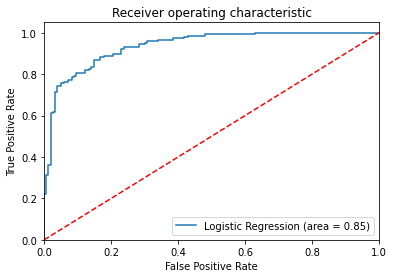

In [12]:
### Printing ROC curve The receiver operating characteristic (ROC)

from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, model.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

## Conclusion:

We can see by simply applying GridSearch and Regularization, our model improved a little. You can explore similar techniques to build more robust model